In [1]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=[])

In [2]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:

The following additional environment variables have been loaded from `~/custom.env`:
* `AWS_BUCKET`
* `DAPA_URL`
* `DB_HOST`, `DB_NAME`, `DB_PASSWORD`, `DB_USER`
* `OGC_EDC_URL`
* `REFERENCE_DATA`


In [3]:
%matplotlib inline

In [4]:
days = 6

/opt/conda/envs/eurodatacube-0.24.5/lib/python3.8/site-packages/xcube_sh/config.py:99: UserWarning: the geometry parameter is no longer supported, use bbox instead
  warnings.warn('the geometry parameter is no longer supported, use bbox instead')


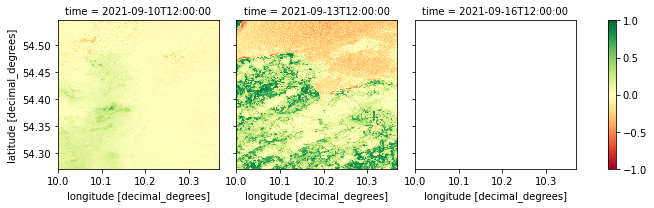

In [5]:
import datetime
from xcube_sh.cube import open_cube
from xcube_sh.config import CubeConfig

today = datetime.date.today()
day_in_past = today - datetime.timedelta(days=days)

cube = open_cube(cube_config=CubeConfig(
    dataset_name="S2L2A",
    band_names=["B04", "B08"],
    tile_size=[512, 512],
    geometry=(10.00, 54.27, 10.30, 54.50),
    spatial_res=0.00018,  # = 10.038 meters in degree
    time_range=[day_in_past.isoformat(),  today.isoformat()],
    time_period="3D",
))
ndvi = (cube.B08 - cube.B04) / (cube.B04 + cube.B08)
ndvi.plot.imshow(col='time', col_wrap=3, vmin=-1, vmax=1, cmap='RdYlGn')
      